
<html>
<div style="text-align: center">  

  <div class="center">
  <img src="https://qph.cf2.quoracdn.net/main-qimg-7e482ffe997856aa9055640250bcf59a" width=120px style="padding:10px; text-align: left;"/>

    

<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 170, 141, 220 )); width: auto; text-align: center; height: 40px; margin: 10px;">
<h1 style="font-family: Georgia; color: black;">AI - Project6: Clustering & NLP</h1>
</div>
<div style=" background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  )); width: 400px; height: 30px; margin: 10px; text-alighn:middle">
  <span style="font-family: Georgia; font-size:15pt; color: ; vertical-align: left;">Shahzad Momayez </span>
    
</div>
    
<div style=" background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  )); width: 400px; height: 30px; margin:10px 10px; text-alighn:middle">
  <span style="font-family: Georgia; font-size:12pt; color: ; vertical-align: left;">Student Id: 810100272</span>
    

</html>











In [6]:
import pandas as pd
from parsivar import Normalizer
from parsivar import Tokenizer
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import homogeneity_score, silhouette_score
import re
from parsivar import Tokenizer, Normalizer, FindStems

In [7]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv') 
#df = df.head(1000).copy()
#test_df2 = test_df.head(100).copy()
#df2

In [8]:
test_df.size

2230

# Qusetion1: If the number of data was unbalanced, what problems occurred in the clustering process? What is your solution to solve these problems? explain.

When the number of data points in each class in the training data is unbalanced, several problems can occur in the clustering process. Here are some of the key issues:

1. **Bias Towards Larger Classes**: Clustering algorithms might be biased towards larger classes. This means that the resulting clusters may predominantly reflect the characteristics of the more abundant classes, while the smaller classes might be underrepresented or even ignored.

2. **Poor Representation of Minority Classes**: Smaller classes may not form distinct clusters and might be absorbed into clusters of larger classes. This can lead to poor representation of minority classes and a lack of recognition of their unique characteristics.

3. **Reduced Cluster Quality**: The presence of large imbalanced classes can result in clusters with high variance and low cohesion, reducing the overall quality and interpretability of the clustering results.

4. **Overfitting to Majority Classes**: Algorithms might overfit to the majority classes, resulting in poor generalization to new data, especially those from minority classes.

### Solutions to Address Imbalanced Data in Clustering:

1. **Resampling the Data**: Adjust the dataset to have a more balanced distribution through resampling techniques. This can be done by oversampling minority classes (creating synthetic data points or duplicating existing ones) or undersampling majority classes (removing data points). Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be particularly effective.

2. **Using Appropriate Clustering Algorithms**: Choose clustering algorithms that are less sensitive to imbalanced data. For example, density-based algorithms like DBSCAN or OPTICS can handle varying densities and sizes of clusters more effectively than algorithms like K-means.

3. **Incorporating Class Weights**: Modify the clustering algorithm to incorporate class weights, giving more weight to minority classes. This helps in ensuring that the characteristics of these classes are adequately represented.

4. **Using Anomaly Detection Techniques**: In cases where minority classes can be considered as anomalies, anomaly detection algorithms can help in identifying these rare instances.

5. **Cluster Analysis and Post-Processing**: Perform careful analysis of the resulting clusters and apply post-processing techniques. This might involve splitting or merging clusters based on domain knowledge or additional criteria to better represent minority classes.

6. **Feature Engineering**: Improving feature representation can sometimes help in making minority classes more distinct. Feature selection or extraction techniques can be explored to achieve this.

It's important to choose a solution that is suitable for the specific characteristics of the dataset and the clustering task at hand. Often, a combination of these strategies may yield the best results.

# ${ First Phase: Data Preprocessing}$

In [9]:
my_normalizer = Normalizer(statistical_space_correction=True)
my_tokenizer = Tokenizer()
my_stemmer = FindStems()
    
def preprocess_text(text):
    normalized_text = my_normalizer.normalize(text)
    cleaned_text = re.sub(r'[\n\r]+', ' ', normalized_text)
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
    words = my_tokenizer.tokenize_words(cleaned_text)
    unique_words = list(dict.fromkeys(words))
    stemmed_words = [my_stemmer.convert_to_stem(word) for word in unique_words]

    return stemmed_words



In [10]:
df['content'] = df['content'].apply(preprocess_text)


In [11]:
test_df['content'] = test_df['content'].apply(preprocess_text)

In Natural Language Processing (NLP), preprocessing is a critical step to clean and prepare text data for further analysis and modeling. Different types of preprocessing are often required to transform raw text into a more manageable and standardized format. Here are some common types of preprocessing in NLP:

1. **Tokenization**: This involves splitting text into sentences, phrases, or words. It's the process of converting a text blob into tokens, which are smaller units like words or terms.

2. **Normalization**: This step includes converting all characters to the same case (usually lowercase), removing punctuation, and sometimes involves accent removal. Its goal is to reduce the variability in text.

3. **Removing Stop Words**: Stop words are common words like "is", "and", "the", etc., which are often removed because they usually don't carry significant meaning and are extremely common.

4. **Stemming and Lemmatization**: 
   - **Stemming** reduces words to their base or root form, often in a heuristic way (e.g., removing suffixes). For instance, "running" → "run".
   - **Lemmatization** also reduces words but transforms them into their actual root form based on dictionary definitions. For example, "better" → "good".

5. **Part-of-Speech (POS) Tagging**: This involves identifying and tagging each word's part of speech (noun, verb, adjective, etc.) based on its definition and context.

6. **Named Entity Recognition (NER)**: Identifying and categorizing key information (entities) in text into predefined categories like names of people, organizations, locations, expressions of times, quantities, monetary values, etc.

7. **Removing Special Characters and Numbers**: This includes removing characters like symbols and numbers that are often not relevant in text analysis.

8. **Handling or Removing Emojis and Emoticons**: In social media text analysis, handling emojis and emoticons can be crucial, as they can carry significant sentiment or context.

9. **Noise Removal**: This refers to the removal of irrelevant characters, symbols, or terms in the text. Noise can vary depending on the text source.

10. **Spell Correction**: Correcting spelling errors in the text can be important, especially for user-generated content.

11. **Text Segmentation**: Dividing text into segments, such as phrases or topics, which can be useful in deeper text analysis.

12. **Syntactic Parsing**: Analyzing the syntax of a sentence by establishing relationships between “head” words and words which modify those heads.

13. **N-grams Creation**: Creating combinations of N-words occurring together. N-grams help in capturing context in text data.

14. **Feature Extraction**: Converting text into a numerical format so that it can be used as input for machine learning algorithms. This includes techniques like Bag of Words, TF-IDF, Word Embeddings, etc.

The preprocessing steps chosen often depend on the specific requirements of the NLP task at hand. For example, sentiment analysis might require different preprocessing steps than topic modeling.

# Question2:  Explain replacing words with stemming lemmatization method.

Replacing words with their stems or lemmas is a common process in Natural Language Processing (NLP) known as stemming and lemmatization, respectively. Both methods aim to reduce words to a base or root form but differ in their approach and complexity.

### Stemming

**What is it?**
- Stemming is a heuristic process that cuts off the ends of words in the hope of achieving this goal correctly most of the time. It is a simpler and faster method.
- Stems may not always be actual words; they are just truncated forms of words.

**How does it work?**
- It typically involves removing common word endings, such as "es", "s", "ed", "ing", etc.
- For example, the stem of the words "running", "runner", and "ran" might all be "run".

**Tools & Usage**
- Common stemming algorithms include the Porter, Snowball, and Lancaster stemmers.
- Used in search engines for indexing words. It’s helpful in query expansion and standardization.

### Lemmatization

**What is it?**
- Lemmatization, unlike stemming, reduces words to their base or root form based on the actual linguistic and grammatical analysis. This base form is known as a lemma.
- Lemmas are always valid words.

**How does it work?**
- It involves more sophisticated morphological analysis to accurately identify the lemma for each word.
- For example, "am", "are", and "is" are all lemmatized to "be".

**Tools & Usage**
- Lemmatization is often achieved using vocabularies and morphological analysis, such as WordNet lemmatizer in NLTK.
- Useful in tasks that require high levels of accuracy and context understanding, like language translation and sentiment analysis.

### Comparison and Choice

- **Accuracy**: Lemmatization usually provides more accurate results but at the cost of complexity and speed.
- **Speed**: Stemming is faster but less accurate.
- **Context Understanding**: Lemmatization understands context better, whereas stemming just works on the word level.
- **Word Forms**: The output of stemming might not be a valid word, but lemmatization always returns a valid word.

In summary, the choice between stemming and lemmatization depends on the specific requirements of your application. If speed and simplicity are more critical, stemming might be the way to go. However, if accuracy and context understanding are more important, lemmatization would be the preferred method.

# ${second Phase: Problem Process }$

In [12]:
tagged_data_train = [TaggedDocument(words=row['content'], tags=[index]) for index, row in df.iterrows()]
tagged_data_test = [row['content'] for index, row in test_df.iterrows()]

In [13]:
model = Doc2Vec(vector_size=10, min_count=2, epochs=40)
model.build_vocab(tagged_data_train)
model.train(tagged_data_train, total_examples=model.corpus_count, epochs=model.epochs)
train_vectors = [model.dv[i] for i in range(len(tagged_data_train))]
test_vectors = [model.infer_vector(doc) for doc in tagged_data_test]

In [14]:
train_vector = np.array(train_vectors)
test_vector = np.array(test_vectors)

num= 6 
kmeans = KMeans(n_clusters=num,random_state=41 )
kmeans_labels = kmeans.fit_predict(train_vector)


train_kmeans = kmeans.labels_
test_kmeans = kmeans.predict(test_vector)

C:\Users\a\anaconda3\2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
import plotly.figure_factory as ff
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

label_encoder = LabelEncoder()
train_true_labels = label_encoder.fit_transform(df['label'])
test_true_labels = label_encoder.transform(test_df['label'])  

cm = confusion_matrix(train_true_labels, train_kmeans)


C:\Users\a\anaconda3\2\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [16]:
dbscan = DBSCAN(eps=2.5, min_samples=20, metric='euclidean',leaf_size=20)  
dbscan_labels = dbscan.fit_predict(train_vector)
print("Number of clusters in K-Means:", len(set(kmeans_labels)))
print("Number of clusters in DBSCAN:", len(set(dbscan_labels)))

df['KMeans_Labels'] = kmeans_labels
df['DBSCAN_Labels'] = dbscan_labels

Number of clusters in K-Means: 6
Number of clusters in DBSCAN: 3


In [17]:
unique_labels_dbscan = set(dbscan_labels)
print("Unique labels in DBSCAN clustering:", unique_labels_dbscan)

# Exclude noise label if present
if -1 in unique_labels_dbscan:
    unique_labels_dbscan.remove(-1)

num_clusters_dbscan = len(unique_labels_dbscan)
print("Number of clusters (excluding noise) in DBSCAN:", num_clusters_dbscan)

Unique labels in DBSCAN clustering: {0, 1, -1}
Number of clusters (excluding noise) in DBSCAN: 2


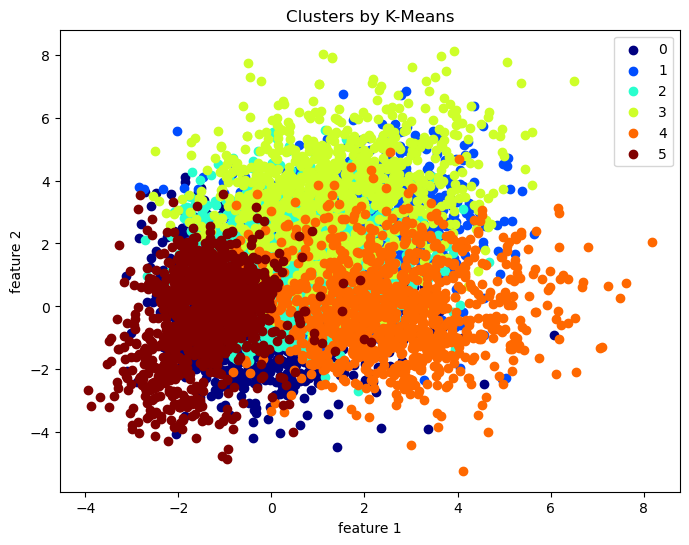

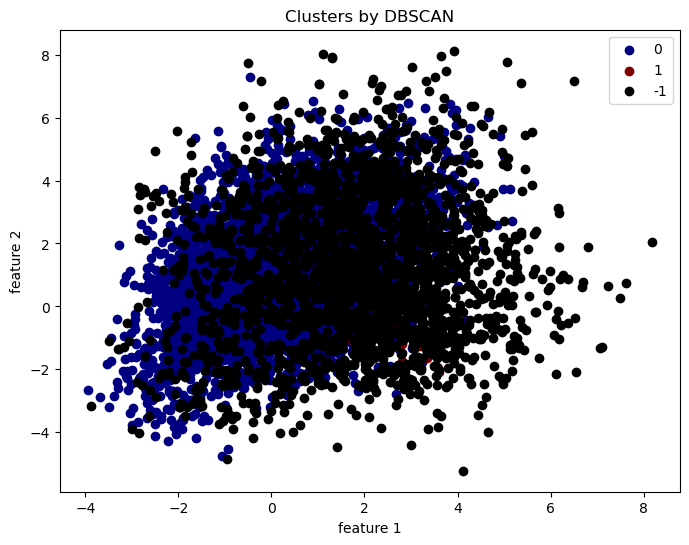

In [18]:
def plot_clusters(reduced_vectors, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:  # For noise points in DBSCAN
            color = 'black'
        else:
            color = plt.cm.jet(float(label) / max(unique_labels))
        cluster_points = reduced_vectors[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=label)
    plt.title(title)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.legend()
    plt.show()

# Plotting K-Means clusters
plot_clusters(train_vector, kmeans_labels, "Clusters by K-Means")

# Plotting DBSCAN clusters
plot_clusters(train_vector, dbscan_labels, "Clusters by DBSCAN")

# Question3: Explain the reason for using the feature vector and its features in the report.
it is is important for the following reasons:

1. **Capturing Semantic Information**: Doc2Vec is adept at capturing the semantic meaning of text documents. Explaining its use in a report highlights the intention to go beyond surface-level text analysis (like simple word counts) to understand the underlying themes and patterns in the text.

2. **Dimensionality Reduction**: Text data is inherently high-dimensional (each unique word can be a dimension). Doc2Vec reduces this high-dimensional text data into a lower-dimensional, dense feature vector. This process makes it feasible to apply various machine learning algorithms, and explaining it in the report clarifies the method of simplifying complex text data.

3. **Uniform Representation**: Doc2Vec provides a fixed-length vector regardless of the length of the text document, which is crucial for consistent input into machine learning models. Discussing this aspect can clarify how it addresses challenges associated with varying document lengths.

4. **Contextual Understanding**: Unlike simpler bag-of-words models, Doc2Vec takes into account the order of words and the context in which they appear. Including this information in a report emphasizes the model's capability to capture more nuanced language features than traditional models.

5. **Model Performance and Suitability**: Explaining the use of Doc2Vec feature vectors can also address why this model was chosen over others, how it performs on the specific dataset, and its suitability for the task at hand, whether it be classification, clustering, or similarity analysis.

6. **Interpretability of Results**: In reports, particularly those intended for a non-technical audience, discussing the feature vectors helps in explaining how the results were derived. It bridges the gap between complex NLP techniques and practical insights that can be gleaned from the analysis.

7. **Justification of Preprocessing Steps**: Doc2Vec requires specific preprocessing steps (like tokenization). Explaining these steps in relation to the feature vectors provides a complete picture of the data processing pipeline and justifies the decisions made during preprocessing.

discussing the use of Doc2Vec feature vectors in a report is crucial for demonstrating the analytical rigor of the text analysis approach, justifying the methodological choices, and enhancing the reader's understanding of how textual data is converted into actionable insights.

--------
The features of a feature vector in the context of machine learning and data analysis represent the individual measurable properties or characteristics of the phenomenon being observed. Essentially, a feature vector encapsulates data in a format that a machine learning model can understand and process. The specific nature of these features varies depending on the application, but generally, they share certain characteristics:

1. **Numerical Representation**: Features are typically represented numerically. Even if the original data is not numerical (like text or images), it is converted into a numerical format, as this is what machine learning algorithms work with.

2. **Fixed Size**: A feature vector usually has a fixed size, meaning it contains a fixed number of elements. Each element in the vector represents a particular feature of the data point.

3. **Homogeneity**: All feature vectors within a dataset typically share the same structure and type of data. For instance, if one feature vector represents an image as a list of pixel values, all other feature vectors in the dataset should represent images in the same way.

4. **Scalability**: Features should be scalable and normalizable. This means they can be adjusted to have a similar scale or distribution, which is important for many machine learning algorithms to perform optimally.

5. **Relevance**: Ideally, features should be relevant to the task at hand. Irrelevant or redundant features can reduce model performance and increase computational complexity.

6. **Independence**: Features are ideally independent of each other, meaning the value of one feature does not depend on the value of another. Highly correlated features can lead to redundancy.

7. **Informative**: Each feature should provide some information about the data point that is useful for the learning task.

8. **Extracted from Raw Data**: Features are often derived from raw data through a process called feature extraction. For example, in image processing, features might include edges, corners, and colors; in text processing, features might include word frequencies or presence of specific words.

9. **Varied Types**: Features can be of various types - continuous (e.g., height, weight), categorical (e.g., gender, nationality), binary (e.g., yes/no, true/false), ordinal (e.g., ratings), and so on.

10. **Context-Specific**: The nature and definition of features are highly dependent on the specific context and domain of the data. For example, features in a medical dataset might include age, blood pressure, and cholesterol levels, while features in a financial dataset might include income, credit score, and loan amount.

Understanding and carefully designing the feature vector is a critical step in the machine learning process, as the quality and appropriateness of features directly impact the performance of the model.

# Question4: explain how "word2vec" and "doc2vec" work. and explain about converting text to feature vector.
### Word2Vec

**How it Works**:
1. **Concept**: Word2Vec is a group of models designed to produce word embeddings, which are vector representations of words. These embeddings capture semantic meanings based on the words’ context.

2. **Training Process**: Word2Vec uses a neural network with one hidden layer to train its model. It can be trained using either of two architectures:
   - **CBOW (Continuous Bag of Words)**: Predicts a target word based on context words (surrounding words).
   - **Skip-gram**: Predicts context words from a target word.

3. **Context Understanding**: By training on a large corpus of text, Word2Vec learns associations between words. For example, it understands that words like 'Paris' and 'France' often appear in similar contexts as 'Berlin' and 'Germany', and hence, their vector representations will be similar.

4. **Feature Vectors**: The output of Word2Vec is a feature vector for each word in the vocabulary, capturing its contextual meanings. These vectors can then be used in various NLP tasks.

### Doc2Vec

**How it Works**:
1. **Concept**: An extension of Word2Vec, Doc2Vec (also known as Paragraph Vector) provides a way to represent entire documents (including paragraphs and sentences) as vectors.

2. **Training Process**: Similar to Word2Vec, but with the addition of a document token that acts as a unique identifier for each document. Like Word2Vec, Doc2Vec also comes in two flavors:
   - **Distributed Memory (DM)**: Similar to CBOW, but with an additional document token.
   - **Distributed Bag of Words (DBOW)**: Similar to Skip-gram, but predicts words randomly sampled from the paragraph in the same way.

3. **Document Representation**: By training, Doc2Vec learns to associate words with other words in the same document. This way, it captures not just the semantic meaning of individual words, but also the context and information about the document as a whole.

4. **Feature Vectors**: The output of Doc2Vec is a feature vector representing each document. This vector captures the essence of the document and can be used for tasks like document similarity, clustering, and classification.

### Converting Text to Feature Vector

1. **Word Embeddings**: With Word2Vec, each word in a document is converted into a vector. The entire document can be represented as the mean or aggregate of these word vectors.

2. **Document Embeddings**: With Doc2Vec, the entire document is directly converted into a single vector that represents the semantic information and context of the whole document.

3. **Applications**: These feature vectors are then used in various NLP applications, such as sentiment analysis, document classification, and clustering. They enable algorithms to process and analyze text data by converting them into numerical form.

In summary, Word2Vec and Doc2Vec are powerful tools for converting text into numerical feature vectors, capturing the semantic and contextual meanings of words and documents, respectively. These representations are fundamental in enabling machines to understand and process natural language text.

# Question5: Explain about the K-means DBSCAN methods and the advantages and disadvantages of these methods.

### K-means Clustering

**How it Works**:
- K-means is a centroid-based clustering algorithm that partitions the data into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.
- It tries to make the inter-cluster data points as similar as possible while keeping the clusters as different (or as far apart) as possible.
- The algorithm iterates between two steps: assigning data points to the nearest cluster centroid and then updating the centroid to be the mean of its assigned points.

**Advantages**:
1. **Efficiency**: It's generally fast and efficient in terms of computational cost, typically O(K*n*d), where n is the number of data points, K is the number of clusters, and d is the number of attributes.
2. **Simplicity and Ease of Implementation**: K-means is simple to understand and easy to implement.
3. **Scalability**: Works well with large datasets.

**Disadvantages**:
1. **Choosing K**: You need to specify the number of clusters (K) in advance.
2. **Sensitivity to Initial Centroids**: The initial placement of centroids can affect the final outcome.
3. **Sensitivity to Outliers**: Outliers can skew the results because K-means tries to optimize the sum of squares.
4. **Assumption of Spherical Clusters**: It assumes that clusters are of spherical shape and evenly sized, which might not always be the case.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**How it Works**:
- DBSCAN is a density-based clustering algorithm that creates clusters based on the idea of density reachability and connectivity.
- It separates the dataset into three types of points: core points, border points, and noise points, based on the density (the number of points within a given radius).
- A cluster grows as long as there are enough dense points within the neighborhood.

**Advantages**:
1. **No Need to Specify the Number of Clusters**: Unlike K-means, DBSCAN doesn't require you to specify the number of clusters beforehand.
2. **Handling Outliers**: It is good at handling noise and outliers.
3. **Arbitrary Cluster Shapes**: Can find arbitrarily shaped clusters.
4. **Robust to Noise**: DBSCAN is resistant to noise points.

**Disadvantages**:
1. **Choosing Parameters**: DBSCAN requires setting the radius (epsilon) and the minimum number of points required to form a dense region (minPts), which can be non-trivial.
2. **Varying Densities**: Struggles with datasets where the density varies significantly across clusters.
3. **High-Dimensional Data**: Performance degrades in high-dimensional spaces.

### Summary
- **K-means** is best suited for datasets with spherical clusters and is computationally more efficient for large datasets, but it requires the number of clusters to be specified and can be sensitive to outliers and initial centroids.
- **DBSCAN** is excellent for datasets with clusters of arbitrary shapes and varying densities. It is more robust to outliers and does not require specifying the number of clusters, but choosing its parameters can be challenging, and it may struggle with high-dimensional data.

In [19]:
#homogeneity_kmeans = homogeneity_score(true_labels, kmeans_labels)
#homogeneity_dbscan = homogeneity_score(true_labels, dbscan_labels)

# Silhouette
silhouette_kmeans = silhouette_score(train_vectors, kmeans_labels)
silhouette_dbscan = silhouette_score(train_vectors, dbscan_labels)


print("Silhouette K-Means:", silhouette_kmeans)
print("Silhouette DBSCAN:", silhouette_dbscan)



Silhouette K-Means: 0.20203783
Silhouette DBSCAN: 0.120384194


In [20]:
from sklearn.metrics import homogeneity_score

# homogeneity
homogeneity_kmeans = homogeneity_score(df['label'].tolist(), kmeans_labels)
homogeneity_dbscan = homogeneity_score(df['label'].tolist(), dbscan_labels)


print("homogeneity K-Means:", homogeneity_kmeans)
print("homogeneity DBSCAN:", homogeneity_dbscan)

homogeneity K-Means: 0.5153406557067919
homogeneity DBSCAN: 0.02132230717799796


# Qustion6: Compare the output of two types of clustering.

# ${  Third  Phase: Reducing Dimension  *bonus*}$

In [21]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(train_vector)

In [22]:
num= 6 
kmeans = KMeans(n_clusters=num,random_state=41 )
kmeans_labels = kmeans.fit_predict(reduced_vectors)
train_kmeans = kmeans.labels_

C:\Users\a\anaconda3\2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
label_encoder = LabelEncoder()
train_true_labels = label_encoder.fit_transform(df['label'])
test_true_labels = label_encoder.transform(test_df['label'])  

cm = confusion_matrix(train_true_labels, train_kmeans)

In [24]:
dbscan = DBSCAN(eps=0.7, min_samples=25, metric='euclidean',leaf_size=20)  
dbscan_labels = dbscan.fit_predict(reduced_vectors)
print("Number of clusters in K-Means:", len(set(kmeans_labels)))
print("Number of clusters in DBSCAN:", len(set(dbscan_labels)))

df['KMeans_Labels'] = kmeans_labels
df['DBSCAN_Labels'] = dbscan_labels

Number of clusters in K-Means: 6
Number of clusters in DBSCAN: 2


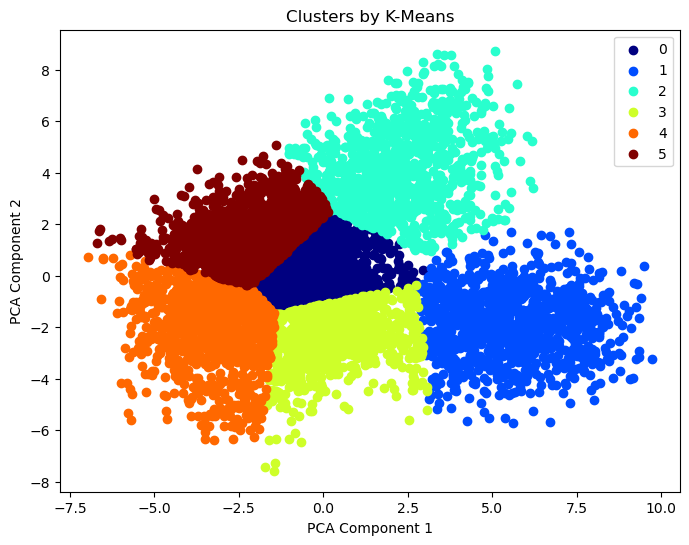

C:\Users\a\AppData\Local\Temp\ipykernel_7008\1715052575.py:11: RuntimeWarning: invalid value encountered in divide
  color = plt.cm.jet(float(label) / max(unique_labels) )


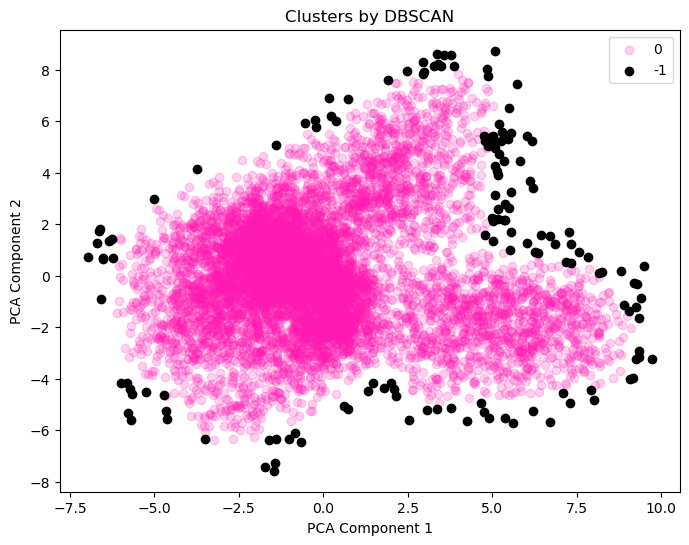

In [25]:
import matplotlib.pyplot as plt

# Function to plot the clusters
def plot_clusters(reduced_vectors, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:  # For noise points in DBSCAN
            color = 'black'
        else:
            color = plt.cm.jet(float(label) / max(unique_labels) )
            if (color == (0.0, 0.0, 0.0, 0.0)):
                color =  (1.0, 0.1, 0.70, 0.2)
        cluster_points = reduced_vectors[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color if color != "White" else "pink"], label=label)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

# Plotting K-Means clusters
plot_clusters(reduced_vectors, kmeans_labels, "Clusters by K-Means")

# Plotting DBSCAN clusters
plot_clusters(reduced_vectors, dbscan_labels, "Clusters by DBSCAN")


# Question7: what is PCA and briefly explain how it works.
PCA (Principal Component Analysis) is a statistical technique used in the field of data analysis and machine learning for dimensionality reduction while preserving as much of the data's variation as possible. It transforms the data into a new coordinate system, such that the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

### How PCA Works:

1. **Standardization**: The first step in PCA is often to standardize the data so that each feature contributes equally to the analysis. This involves scaling the data so that each feature has a mean of 0 and a standard deviation of 1.

2. **Covariance Matrix Computation**: PCA starts by computing the covariance matrix of the data, which helps in understanding how each variable in the data relates to the others.

3. **Eigenvalue and Eigenvector Calculation**: The algorithm then calculates the eigenvalues and eigenvectors of this covariance matrix. Eigenvectors point in the direction of the largest variance, and eigenvalues correspond to the magnitude of these eigenvectors.

4. **Sort and Rank**: The eigenvalues and corresponding eigenvectors are sorted in order of decreasing eigenvalues. The larger an eigenvalue, the more of the data's variance that its corresponding eigenvector captures.

5. **Principal Component Selection**: The next step is selecting the top `k` eigenvectors (where `k` is the number of dimensions you want to keep) based on their corresponding eigenvalues. These eigenvectors are the principal components of the data.

6. **Transformation**: Finally, the original data is transformed into this new space (of `k` dimensions) using the principal components. The transformed data represents the original data in the new coordinate system of the principal components, reducing the number of dimensions while attempting to preserve the variability present in the original data.

### Summary

- PCA is particularly useful in processing data with a large number of dimensions (features).
- It helps in visualizing high-dimensional data, compressing data, and speeding up learning algorithms.
- While PCA is a powerful tool, one of its limitations is that it assumes linear relationships among variables and might not work effectively with data that has non-linear structures.

# ${Evaluation And Analysis Of Data}$

# Question8: Explain how to calculate the silhouette homogeneity criterion.
**Silhouette Score:**
The silhouette score is a metric used to evaluate the quality of a clustering solution, such as K-means clustering. It measures how similar each data point in a cluster is to the other data points in the same cluster compared to the most similar neighboring cluster. The silhouette score ranges from -1 to +1, where higher values indicate better clustering results:

- A score close to +1 suggests that data points are well-clustered and are far away from neighboring clusters.
- A score close to 0 suggests overlapping clusters.
- A score close to -1 indicates that data points may have been assigned to the wrong clusters.

In [26]:
#homogeneity_kmeans = homogeneity_score(true_labels, kmeans_labels)
#homogeneity_dbscan = homogeneity_score(true_labels, dbscan_labels)

# Silhouette
silhouette_kmeans = silhouette_score(reduced_vectors, kmeans_labels)
silhouette_dbscan = silhouette_score(reduced_vectors, dbscan_labels)


print("Silhouette K-Means:", silhouette_kmeans)
print("Silhouette DBSCAN:", silhouette_dbscan)



Silhouette K-Means: 0.37639686
Silhouette DBSCAN: 0.44762057


In [27]:
from sklearn.metrics import homogeneity_score

# homogeneity
homogeneity_kmeans = homogeneity_score(df['label'].tolist(), kmeans_labels)
homogeneity_dbscan = homogeneity_score(df['label'].tolist(), dbscan_labels)


print("homogeneity K-Means:", homogeneity_kmeans)
print("homogeneity DBSCAN:", homogeneity_dbscan)

homogeneity K-Means: 0.4247541306755314
homogeneity DBSCAN: 0.004263407640590828


In [28]:
import pandas as pd
from collections import Counter
from sklearn.metrics import precision_score


true_labels = df['label'].tolist()
df = pd.DataFrame({'TrueLabel': true_labels, 'KMeansLabel': kmeans_labels})

def create_label_mapping(df, true_label_col, cluster_label_col):
    mapping = {}
    for cluster in df[cluster_label_col].unique():
        mode_label = df[df[cluster_label_col] == cluster][true_label_col].mode()[0]
        mapping[cluster] = mode_label
    return mapping

label_mapping = create_label_mapping(df,'TrueLabel', 'KMeansLabel')

def map_labels(original_labels, mapping):
    return [mapping[label] for label in original_labels]


aligned_kmeans_labels = map_labels(kmeans_labels, label_mapping)


precision = precision_score(true_labels, aligned_kmeans_labels, average='weighted')
print("Precision:", precision)


Precision: 0.6810102993581523


In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels, aligned_kmeans_labels)
print("Accuracy:", accuracy)

Accuracy: 0.5927777777777777


# Question 9: Report the results of the mentioned indicators for each of the methods.
I reported the results above this textbox.

# Question 10: Suggest solutions to improve the performance of the models

Improving the performance of KMeans and DBSCAN clustering algorithms involves various strategies, from preprocessing the data to fine-tuning algorithm parameters. Here are some suggestions for both:

### KMeans

1. **Feature Scaling**: KMeans is sensitive to the scale of the data. Features on larger scales can dominate the algorithm's behavior. Standardizing or normalizing your data ensures that each feature contributes equally to the distance computations.

2. **Feature Selection**: Remove irrelevant or redundant features. KMeans can perform poorly if the dataset contains features that are not useful for clustering.

3. **Choosing the Right Number of Clusters (`k`)**: Use methods like the Elbow Method, the Silhouette Coefficient, or the Gap Statistic to determine an appropriate number of clusters.

4. **Initializing Centroids Wisely**: The default method in scikit-learn's KMeans is 'k-means++', which is generally better than random initialization. However, running the algorithm multiple times with different initializations and choosing the best result can also be beneficial.

5. **Handling Non-spherical Data**: KMeans assumes that clusters are spherical and equally sized, which is not always the case. Sometimes transforming the data, e.g., using PCA for dimensionality reduction, can lead to more spherical clusters.

### DBSCAN

1. **Parameter Tuning**:
   - **`eps` and `min_samples`**: These are crucial parameters. Use a k-distance plot to choose an appropriate `eps` value. The `min_samples` can be set based on domain knowledge or experimental tuning.
   - **Distance Metric**: The choice of distance metric (Euclidean, Manhattan, etc.) can significantly affect the results. Choose one that makes sense for your data.

2. **Data Scaling**: Like KMeans, DBSCAN is sensitive to the scale of the data. Normalizing or standardizing your features can lead to better clustering results.

3. **Dealing with High Dimensionality**: In high dimensions, distance metrics become less useful (curse of dimensionality). Dimensionality reduction techniques like PCA or t-SNE might help before applying DBSCAN.

4. **Handling Noise**: DBSCAN can identify outliers as noise. Analyzing these noise points can provide insights and help in adjusting parameters if too many points are classified as noise.

5. **Experimenting with Different Parameters**: There's no one-size-fits-all set of parameters for DBSCAN. Experiment with different values of `eps` and `min_samples`, and assess the clustering results.

### General Tips for Both Algorithms

- **Understanding Your Data**: Know the characteristics of your dataset. Clustering is an exploratory technique, and its success often hinges on how well the data and its features represent the problem you're trying to solve.

- **Use of Domain Knowledge**: Incorporating domain knowledge can guide you in preprocessing, feature engineering, and interpreting the results.

- **Evaluation Metrics**: Use internal evaluation metrics like the Silhouette Coefficient, Calinski-Harabasz Index, or Davies-Bouldin Index to assess the quality of clusters.

- **Visualizing Results**: If feasible, visualize your clustering results using techniques like scatter plots or t-SNE. This can give you insights into the clusters and how well the algorithm is performing.

- **Algorithm Selection**: Sometimes, the chosen algorithm might not be the best fit for the data. Be open to trying different clustering algorithms.

Remember, clustering is as much an art as it is a science, and iterative experimentation is often key to finding the best approach for your specific dataset.